In [2]:
from classes import *
import matplotlib.pyplot as plt
%matplotlib inline

# Initial conditions from JPL 

### all distance units in km and velocity units in km/s, mass units vary

Queried by emailing horizons@ssd.jpl.nasa.gov with subject "job" the following request:

```
!$$SOF
EMAIL_ADDR=''
START_TIME = '2022-Apr-13 17:30:58'
STOP_TIME = '2022-Apr-13 17:30:59'
TABLE_TYPE = 'Vector'
REF_PLANE = 'Ecliptic'
CENTER = '@010'
COMMAND='301'
!$$EOF
```

Mercury:

```
M = 3.302e23 #kg
X = 1.334496507271761E+07 Y = 4.395683829943987E+07 Z = 2.244044995240673E+06
VX=-5.592796645557382E+01 VY= 1.737696619461004E+01 VZ= 6.551210726157337E+00
```

Venus:

```
M = 48.685e23 #kg
X =-2.035027308396209E+07 Y =-1.066131883528975E+08 Z =-3.429456862017587E+05
VX= 3.423996366511758E+01 VY=-6.285101184732583E+00 VZ=-2.061818917561456E+00
```

Earth:

```
M = 5.97219e24 #kg
X =-1.396280999072726E+08 Y =-5.762980575443690E+07 Z = 3.120776457355171E+04
VX= 1.103591050190242E+01 VY=-2.758851396628035E+01 VZ= 1.840687757319159E-03
```

Mars:

```
M = 6.4171e23 #kg
X = 8.047184777280146E+07 Y =-1.946809809379555E+08 Z =-6.066378497280762E+06
VX= 2.325259184662595E+01 VY= 1.143797068692442E+01 VZ=-3.302318184882327E-01
```

Jupiter:

```
M = 189818722e22 #g
X = 8.047184777280146E+07 Y =-1.946809809379555E+08 Z =-6.066378497280762E+06
VX= 2.325259184662595E+01 VY= 1.143797068692442E+01 VZ=-3.302318184882327E-01
```

Saturn:

```
M = 5.6834e26 #kg
X = 1.094160137024642E+09 Y =-9.954688038664324E+08 Z =-2.625450639283758E+07
VX= 5.958423004933113E+00 VY= 7.125906789421737E+00 VZ=-3.612377549347165E-01
```

Uranus:

```
M = 86.813e24 #kg
X = 2.110665218390694E+09 Y = 2.057479088704634E+09 Z =-1.970253045827866E+07
VX=-4.800186215060698E+00 VY= 4.573813933558258E+00 VZ= 7.933505399390306E-02
```

Neptune: 

```
M = 102.409e24 #kg
X = 4.437764022619999E+09 Y =-5.636795747701788E+08 Z =-9.066475894411668E+07
VX= 6.487217260942738E-01 VY= 5.424646602236330E+00 VZ=-1.261134781815290E-01
```

Pluto:

```
M = 1.307e22 #kg
X = 2.305748252460431E+09 Y =-4.613454236751003E+09 Z =-1.732909552078559E+08
VX= 5.008533413606842E+00 VY= 1.255652944634751E+00 VZ=-1.598359631357607E+00
```

Earth's moon:

```
M = 7.349e22 #kg
X =-1.399788696294122E+08 Y =-5.746596747781532E+07 Z = 6.569382369634882E+04
VX= 1.066183177668084E+01 VY=-2.852786520655334E+01 VZ=-2.311676702632859E-02
```

Sun:

```
M = 1.9885e30 #kg
X =-1.327155365856181E+06 Y = 3.696435592165196E+05 Z = 2.797429692706882E+04
VX=-4.053301116871642E-03 VY=-1.521752988625974E-02 VZ= 2.173970728782245E-04
```




In [15]:
#set things up from JPL data above
AU = 1.5e11; Msun = 1.9885e30; yearSec = 365*24*3600
Mercury = body(np.array([1.334496507271761E+07,4.395683829943987E+07,2.244044995240673E+06])*1e3,np.array([-5.592796645557382E+01,1.737696619461004E+01,6.551210726157337E+00])*1e3,3.302e23)
Venus = body(np.array([-2.035027308396209E+07,-1.066131883528975E+08,-3.429456862017587E+05])*1e3,np.array([3.423996366511758E+01,-6.285101184732583E+00,-2.061818917561456E+00])*1e3,48.685e23)
Earth = body(np.array([-1.396280999072726E+08,-5.762980575443690E+07,3.120776457355171E+04])*1e3,np.array([1.103591050190242E+01,-2.758851396628035E+01,1.840687757319159E-03])*1e3,5.97219e24)
Mars = body(np.array([8.047184777280146E+07,-1.946809809379555E+08,-6.066378497280762E+06])*1e3,np.array([2.325259184662595E+01,1.143797068692442E+01,-3.302318184882327E-01])*1e3,6.4171e23)
Jupiter = body(np.array([7.267660665202591E+08,-1.522532746374396E+08,-1.562792499377201E+07])*1e3,np.array([2.523260277261755E+00,1.339911888131143E+01,-1.121375853205917E-01])*1e3,189818722e22/1e3)
Saturn = body(np.array([1.094160137024642E+09,-9.954688038664324E+08,-2.625450639283758E+07])*1e3,np.array([5.958423004933113E+00,7.125906789421737E+00,-3.612377549347165E-01])*1e3,5.6834e26)
Uranus = body(np.array([2.110665218390694E+09,2.057479088704634E+09,-1.970253045827866E+07])*1e3,np.array([-4.803777954810626E+00,4.559294716432634E+00,7.938916066371582E-02])*1e3,86.813e24)
Neptune = body(np.array([4.437764022619999E+09,-5.636795747701788E+08,-9.066475894411668E+07])*1e3,np.array([6.487217260942738E-01,5.424646602236330E+00,-1.261134781815290E-01])*1e3,102.409e24)
Pluto = body(np.array([2.305748252460431E+09,-4.613454236751003E+09,-1.732909552078559E+08])*1e3,np.array([5.008533413606842E+00,1.255652944634751E+00,-1.598359631357607E+00])*1e3,1.307e22)
SunCentered = body([0.,0.,0.,],[0.,0.,0.,],Msun) #for two-body interactions
SunBary = body(np.array([-1.327155365856181E+06,3.696435592165196E+05,2.797429692706882E+04])*1e3,np.array([-4.053301116871642E-03,-1.521752988625974E-02,2.173970728782245E-04])*1e3,Msun) #barycentric version for full solar system

In [4]:
import sys
def trackCompletion(place,stop,strLen): 
    """
    progress logger for simulations
    params: place: current time / place in simulation; stop: final time / place in simulation; strLen: the length of previously printed string
    returns: strLen: the length of currently printed string
    """
    string="Currently at T = {0:.2f} / {1:.2f} years".format(place,stop)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

def getPlotData(system,cadence=1e-3,stopT=1,yrErr=1e-3,integrator="RK4"):
    """
    Given a system, this function simulates it for the specified amount of total time and returns points we can use to plot!
    params: system: object generated from system class, a collection of n-bodies; cadence: how often we should store data for plotting/analysis, units of years, defaults to 1e-3 years;
            stopT: the total time we want to simulate, units of years, defaults to 1 year; yrErr: the maximum acceptable error per year, if using non-relativistic adaptive timestep, defaults to 1e-3;
            integrator: the integrator to use, defaults to RK4
    returns: system: the end state of the n-body system after being evolved; t: the array of output times; x,y,z: the array of output x,y,z positions, of shape (nBodies,len(t))
    """
    strLen = 0; oldT = 0; place = 0
    x = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    y = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    z = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    t = np.zeros(int(np.round(stopT/cadence)))
    while system.T < stopT:
        system.update(yrErr=yrErr,integrator=integrator)
        #system.bodies[0].pos = coords(0.,0.,0.) #keep the Sun from moving
        #system.bodies[0].v = velocities(0.,0.,0.)
        if system.T-oldT > cadence:
            strLen = trackCompletion(system.T,stopT,strLen)
            oldT = system.T
            xtmp,ytmp,ztmp,vx,vy,vz = system.getCoords()
            x[:,place] = xtmp
            y[:,place] = ytmp
            z[:,place] = ztmp
            t[place] = system.T
            place += 1

    return system,t[0:place],x[:,0:place],y[:,0:place],z[:,0:place]



In [55]:
solarSystem = system([SunBary,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto],Δt=yearSec/1e3,massiveInd=0,closeInds=[1])
endState,t,x,y,z = getPlotData(solarSystem,stopT=250) #do a test of one pluto orbit

Currently at T = 250.00 / 250.00 years

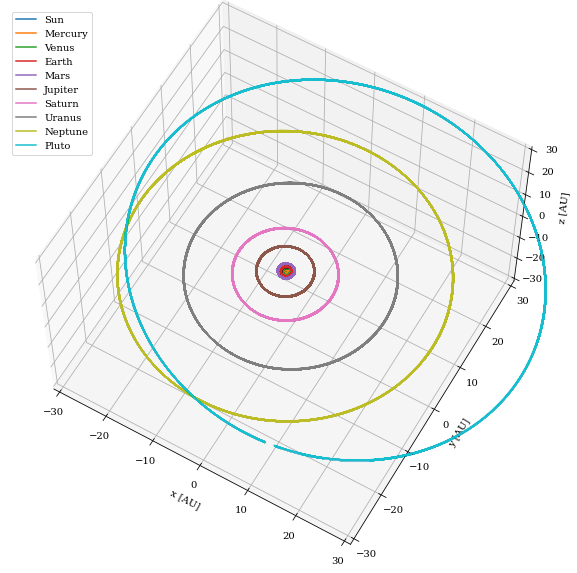

In [56]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto"]
for i in range(solarSystem.nBodies):
    ax.plot3D(x[i,:]/AU,y[i,:]/AU,z[i,:]/AU,label=labels[i],marker=".",ms=0.1)

#ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=60.)
ax.set_xlabel("x [AU]"); ax.set_ylabel("y [AU]"); ax.set_zlabel("z [AU]")
ax.legend()

boxSize = 1
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize)); ax.set_zlim3d((-boxSize,boxSize))
fig.savefig("innerSolarSystem.png")

boxSize = 30
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize)); ax.set_zlim3d((-boxSize,boxSize))
fig.savefig("outerSolarSystem.png")
#looks good!

In [57]:
MP = 87.96926/365*yearSec #orbital period of Mercury in s
solarSystem = system([SunBary,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto],Δt=MP/1e7,massiveInd=0,closeInds=[1])
#trying to do a really small timestep to capture point of precession as exactly as possible
endStateM,tM,xM,yM,zM = getPlotData(solarSystem,stopT=MP*2/yearSec,cadence=MP/1e7/yearSec)

Currently at T = 0.48 / 0.48 years

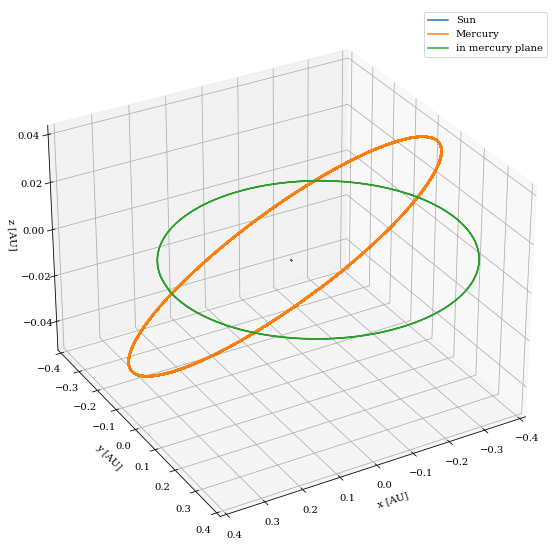

In [58]:
#proof of concept showing that we can go to Mercury orbital plane

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
φ = 48.331/180*np.pi #deg to rad, longitude of ascending node
θ = 7.005/180*np.pi #deg to rad, inclination relative to ecliptic
ψ = 29.124/180*np.pi #deg to rad, argument of periapsis

a11 = np.cos(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.sin(ψ)
a12 = np.cos(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.sin(ψ)
a13 = np.sin(ψ)*np.sin(θ)
a21 = -np.sin(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.cos(ψ)
a22 = -np.sin(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.cos(ψ)
a23 = np.cos(ψ)*np.sin(θ)
a31 = np.sin(θ)*np.sin(φ)
a32 = -np.sin(θ)*np.cos(φ)
a33 = np.cos(θ)

xnew = a11*xM+a12*yM+a13*zM
ynew = a21*xM+a22*yM+a23*zM
znew = a31*xM+a32*yM+a33*zM

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
for i in range(2):
    ax.plot3D(xM[i,:]/AU,yM[i,:]/AU,zM[i,:]/AU,label=labels[i],marker=".",ms=0.1)
    if i >0:
        ax.plot3D(xnew[i,:]/AU,ynew[i,:]/AU,znew[i,:]/AU,label="in mercury plane")
#ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=30.,azim=60.)
boxSize = 0.4
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.set_xlabel("x [AU]");ax.set_ylabel("y [AU]");ax.set_zlabel("z [AU]")
ax.legend()
# plt.xlim(5.3e10,5.4e10)
# plt.ylim(-2e10,0)# 

In [59]:
from scipy.signal import find_peaks

def calcPrecession(plotData,bodyInd=1,height=0.05,width=50): #height threshold in AU
    """
    This function finds the places of perihelion for a given orbital body from the orbital system data and returns the angles at which the perihelion occurs.
    takes in plotData (which contains time, x, y, z information for system), the index of the body we want to calculate precession on (defaults to 1 for Mercury),
    height of peaks (in AU) required (difference from mean distance, defaults to 0.05), and the width of a peak (defaults to 50 cells)
    returns: a: an array of perihelion distances; φ: the angles at which these perihelions occurred; tP: the system times at which each perihelion happened
    """
    AU=1.495978707e11
    t,x,y,z = plotData
    φ = 48.331/180*np.pi #deg to rad, longitude of ascending node
    θ = 7.005/180*np.pi #deg to rad, inclination relative to ecliptic
    ψ = 29.124/180*np.pi #deg to rad, argument of periapsis

    a11 = np.cos(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.sin(ψ)
    a12 = np.cos(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.sin(ψ)
    a13 = np.sin(ψ)*np.sin(θ)
    a21 = -np.sin(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.cos(ψ)
    a22 = -np.sin(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.cos(ψ)
    a23 = np.cos(ψ)*np.sin(θ)
    a31 = np.sin(θ)*np.sin(φ)
    a32 = -np.sin(θ)*np.cos(φ)
    a33 = np.cos(θ)

    #transform orbit to be in orbital plane of Mercury instead of ecliptic
    xnew = a11*xM+a12*yM+a13*zM
    ynew = a21*xM+a22*yM+a23*zM
    znew = a31*xM+a32*yM+a33*zM #this should now be basically zero
    r = np.sqrt((xnew[bodyInd,:]-xnew[0,:])**2+(ynew[bodyInd,:]-ynew[0,:])**2)/AU #Sun fixed at 0, z ~ 0
    peaks, properties = find_peaks((r-np.mean(r))*-1,height=height,width=width)
    φ = np.arctan2((ynew[bodyInd,:]-ynew[0,:])[peaks],(xnew[bodyInd,:]-xnew[0,:])[peaks])
    a = r[peaks]
    tP = t[peaks]
    return a,φ,tP


/home/kirk/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


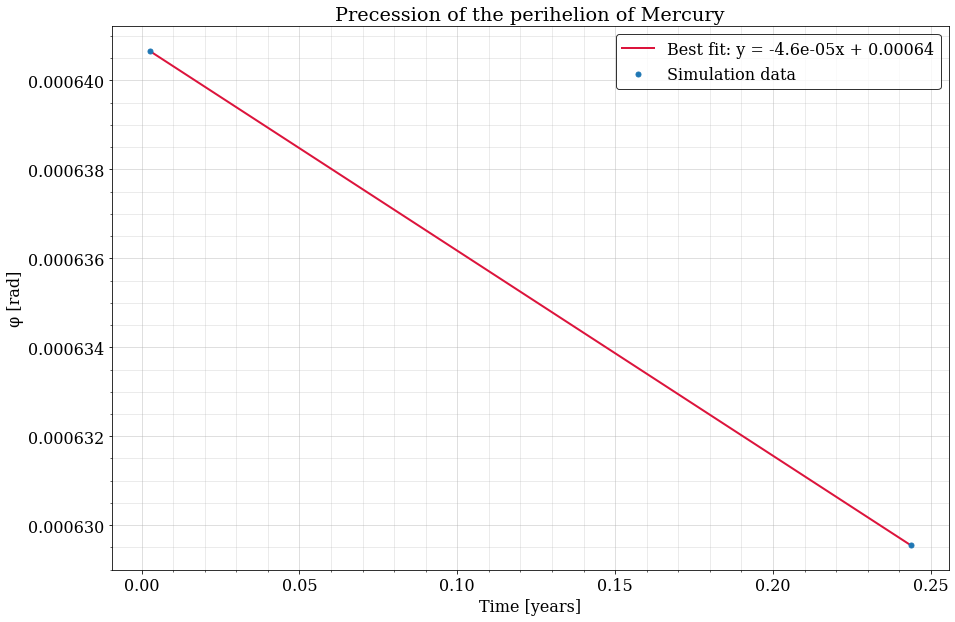

In [70]:
#calculating precession
font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) #set all plot attribute defaults

def pltFormatter(fig,axList,**kwargs):
    for ax in axList:
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        legend=kwargs.get("legend")
        if legend != None:
            legend.get_frame().set_edgecolor('black') 

fig = plt.figure(figsize=(15,10),facecolor='white')
ax = fig.gca()
from scipy.optimize import curve_fit
a,φ,tP = calcPrecession([tM,xM,yM,zM],width=10)
cut = 0
ax.scatter(tP[tP>cut],φ[tP>cut],label="Simulation data",marker=".",zorder=10,s=100)
def f(x,m,b):
    return m*x + b
fit,cov = curve_fit(f,tP[tP>cut],φ[tP>cut])
SSres = np.sum((φ[tP>cut]-f(tP[tP>cut],*fit))**2)
SStot = np.sum((φ[tP>cut]-np.mean(φ[tP>cut]))**2)
R2 = 1-SSres/SStot
#ax.plot(tP[tP>cut],f(tP[tP>cut],*fit),label="Best fit: y = {0:.2g}x + {1:.2g}; R^2 = {2:.2g}".format(*fit,R2),c="crimson",lw=2)
ax.plot(tP[tP>cut],f(tP[tP>cut],*fit),label="Best fit: y = {0:.2g}x + {1:.2g}".format(*fit),c="crimson",lw=2)
ax.set_title("Precession of the perihelion of Mercury")
ax.set_xlabel("Time [years]")
ax.set_ylabel("φ [rad]")
l = ax.legend()
pltFormatter(fig,[ax],legend=l)
#fig.savefig("totalPrecession.png")
fig.savefig("totalPrecessionHighRes.png")

In [66]:
theoryGR = 2.08e-6 #rad/year = 0.43"/year
theoryAll = 2.788e-5 #rad/year = 5.75"/year
print(np.abs(fit[0]-theoryAll)/theoryAll) #error

2.653800897830353


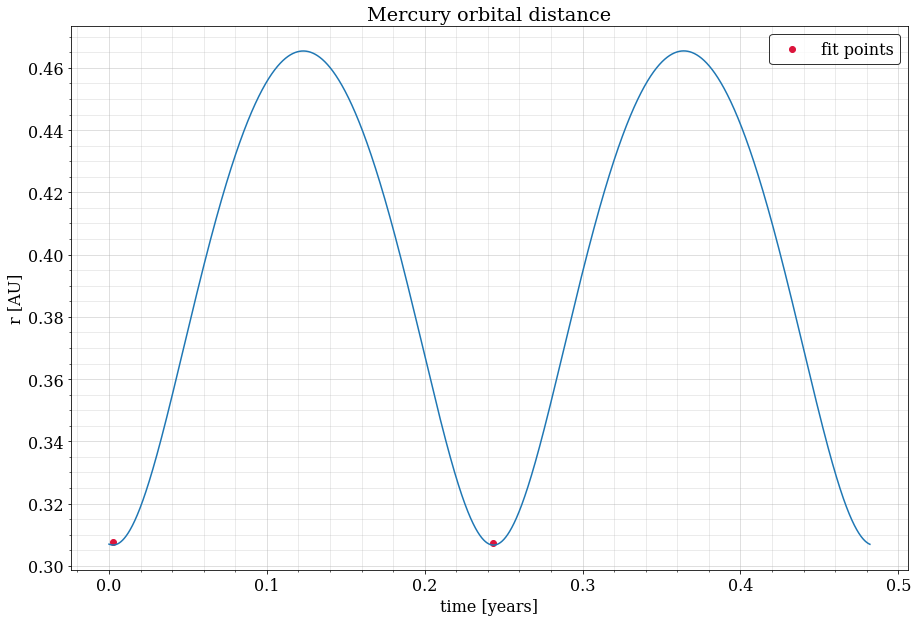

In [75]:
fig = plt.figure(figsize=(15,10),facecolor='white')
ax = fig.gca()
ax.plot(tM,np.sqrt((xnew[1,:]-xnew[0,:])**2+(ynew[1,:]-ynew[0,:])**2)/AU)
ax.scatter(tP,a,color="crimson",label="fit points")
l = ax.legend()
ax.set_title("Mercury orbital distance")
ax.set_xlabel("time [years]")
ax.set_ylabel("r [AU]")
pltFormatter(fig,[ax],legend=l)
fig.savefig("MercuryOrbitalDist.png")

In [77]:
print((tP[-1]-tP[0])*365) #Mercury orbital period, accurate to 4 sig figs

87.96539813472808
